# Practice: Statistical Significance

Let's say that we've collected data for a web-based experiment. In the experiment, we're testing the change in layout of a product information page to see if this affects the proportion of people who click on a button to go to the download page. This experiment has been designed to have a cookie-based diversion, and we record two things from each user: which page version they received, and whether or not they accessed the download page during the data recording period. (We aren't keeping track of any other factors in this example, such as number of pageviews, or time between accessing the page and making the download, that might be of further interest.)

Your objective in this notebook is to perform a statistical test on both recorded metrics to see if there is a statistical difference between the two groups.

In [1]:
# import packages

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats import proportion as proptests

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# import data

data = pd.read_csv('data/statistical_significance_data.csv')
data.head(10)

,condition,click
0,1,0
1,0,0
2,0,0
3,1,1
4,1,0
5,1,0
6,0,0
7,1,1
8,0,0
9,1,0


In [5]:
data['condition'].value_counts()

1    508
0    491
Name: condition, dtype: int64

In the dataset, the 'condition' column takes a 0 for the control group, and 1 for the experimental group. The 'click' column takes a values of 0 for no click, and 1 for a click.

## Checking the Invariant Metric

First of all, we should check that the number of visitors assigned to each group is similar. It's important to check the invariant metrics as a prerequisite so that our inferences on the evaluation metrics are founded on solid ground. If we find that the two groups are imbalanced on the invariant metric, then this will require us to look carefully at how the visitors were split so that any sources of bias are accounted for. It's possible that a statistically significant difference in an invariant metric will require us to revise random assignment procedures and re-do data collection.

In this case, we want to do a two-sided hypothesis test on the proportion of visitors assigned to one of our conditions. Choosing the control or the experimental condition doesn't matter: you'll get the same result either way. Feel free to use whatever method you'd like: we'll highlight two main avenues below.

If you want to take a simulation-based approach, you can simulate the number of visitors that would be assigned to each group for the number of total observations, assuming that we have an expected 50/50 split. Do this many times (200 000 repetitions should provide a good speed-variability balance in this case) and then see in how many simulated cases we get as extreme or more extreme a deviation from 50/50 that we actually observed. Don't forget that, since we have a two-sided test, an extreme case also includes values on the opposite side of 50/50. (e.g. Since simulated outcomes of .48 and lower are considered as being more extreme than an actual observation of 0.48, so too will simulated outcomes of .52 and higher.) The proportion of flagged simulation outcomes gives us a p-value on which to assess our observed proportion. We hope to see a larger p-value, insufficient evidence to reject the null hypothesis.

If you want to take an analytic approach, you could use the exact binomial distribution to compute a p-value for the test. The more usual approach, however, is to use the normal distribution approximation. Recall that this is possible thanks to our large sample size and the central limit theorem. To get a precise p-value, you should also perform a 
continuity correction, either adding or subtracting 0.5 to the total count before computing the area underneath the curve. (e.g. If we had 415 / 850 assigned to the control group, then the normal approximation would take the area to the left of $(415 + 0.5) / 850 = 0.489$ and to the right of $(435 - 0.5) / 850 = 0.511$.)

You can check your results by completing the following the workspace and the solution on the following page. You could also try using multiple approaches and seeing if they come up with similar outcomes!

In [7]:
# your work here: feel free to create additional code cells as needed!

## Simulations

In [8]:
import pandas as pd
import numpy as np

In [53]:
## Ho: there is a statistically significant difference in the invariant

def test_statistic(data):
    '''Return the devitaion of split ratio from 50/50'''

    unique, counts = np.unique(data, return_counts=True)
    offset_from_equal_split = np.abs(0.5 - counts[0]/counts.sum())

    return offset_from_equal_split


def simulations(data):
    """Run simulaiton and return the metric"""
    unique_values = np.unique(data)
    return np.random.choice(unique_values, len(data))


def PValue(data, iters=10):
    """Determine p value through simulations"""

    test_stats = [test_statistic(simulations(data)) for _ in range(iters)]
    actual_stats = test_statistic(data)

    positive_counts = sum(1 for x in test_stats if x >= actual_stats)

    return positive_counts/iters

In [71]:
print ('P value is {:0.1f}%'.format(PValue(data['condition'], iters = 200_000)*100))

P value is 61.3%


## Analytical approach

In [133]:
# Fit the data using normal distribution

from scipy.stats import norm
n = len(data)
loc = n*0.5
std = np.sqrt(n * p * (1-p))

In [113]:
unique, counts = np.unique(data['condition'], return_counts=True)

In [121]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'cdf, cummulative probability')

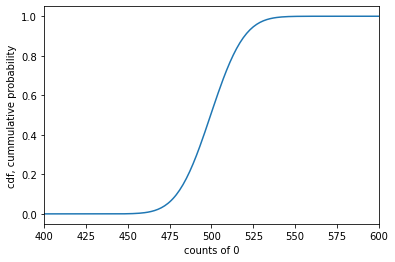

In [161]:
cdfs = norm.cdf( np.arange(1000), loc, std )
plt.plot(np.arange(1000), cdfs) 
plt.xlim([400,600])
# plt.yscale('log')
plt.xlabel('counts of 0')
plt.ylabel('cdf, cummulative probability')

In [159]:
# 0.5 continuity correction (between 491.5 and 490.5,therefore it should be not exceeding 491.5)
p_value = 2 * norm.cdf(491 + 0.5, loc, std)

In [175]:
print ('P value is {:0.1f}%'.format(p_value*100))

P value is 61.3%


In [176]:
p_value

0.6127039025537114

## conclusions:

The hypothesis is not statistically significant. there is quite likely to observe unequal split than what is present in the providided data. There isn't a statistically significant difference in an invariant metric 'condition'

## Checking the Evaluation Metric

After performing our checks on the invariant metric, we can move on to performing a hypothesis test on the evaluation metric: the click-through rate. In this case, we want to see that the experimental group has a significantly larger click-through rate than the control group, a one-tailed test.

The simulation approach for this metric isn't too different from the approach for the invariant metric. You'll need the overall click-through rate as the common proportion to draw simulated values from for each group. You may also want to perform more simulations since there's higher variance for this test.

There are a few analytic approaches possible here, but you'll probably make use of the normal approximation again in these cases. In addition to the pooled click-through rate, you'll need a pooled standard deviation in order to compute a z-score. While there is a continuity correction possible in this case as well, it's much more conservative than the p-value that a simulation will usually imply. Computing the z-score and resulting p-value without a continuity correction should be closer to the simulation's outcomes, though slightly more optimistic about there being a statistical difference between groups.

As with the previous question, you'll find a quiz and solution following the workspace for you to check your results.

In [ ]:
# your work here: feel free to create additional code cells as needed!


In [162]:
data.columns

Index(['condition', 'click'], dtype='object')

In [170]:
# Determine the clik ratios 
data.groupby('condition')['click'].sum(
)/data.groupby('condition')['condition'].apply(lambda x: len(x))

condition
0    0.079430
1    0.112205
dtype: float64

In [171]:
# Use permutation of the click column and compare the difference in results

In [173]:
data.groupby('condition')['click'].mean()

condition
0    0.079430
1    0.112205
Name: click, dtype: float64

In [174]:
np.random.binomial?